# **APRIORI - Housing Prices Dataset**
## 1. Introdução
O objetivo deste trabalho é aplicar o algoritmo Apriori para identificar padrões de associação no dataset de preços de casas, com o intuito de descobrir relações entre características como mobília, quartos e preço.


**Breve Explicação do Algoritmo Apriori:**  
O algoritmo Apriori é utilizado para minerar dados e encontrar associações entre itens em grandes datasets. Ele encontra conjuntos de itens que aparecem frequentemente juntos e gera regras que indicam como um item pode estar relacionado a outros.


## 2. Dataset Utilizado
O dataset utilizado é o **Housing Prices Dataset**, que contém informações sobre casas como número de quartos, área e condições de mobília.


#Importação das Bibliotecas


In [6]:
# Bibliotecas principais para manipulação e análise de dados
import pandas as pd  # Para carregar e manipular datasets
import numpy as np   # Para operações numéricas e arrays

# Bibliotecas para visualização
import matplotlib.pyplot as plt  # Para criar gráficos
import seaborn as sns            # Para visualizações mais avançadas

# Configuração de visualizações
plt.style.use('ggplot')  # Estilo dos gráficos
sns.set_theme()          # Tema padrão para gráficos do Seaborn

import kagglehub



#Carregamento e Exibição do Dataset
Neste código, o dataset é baixado diretamente do Kaggle e descompactado para facilitar o acesso. Após o download, o arquivo CSV é lido e carregado em um DataFrame do Pandas, que é a estrutura de dados utilizada para manipulação e análise das informações.

###O código a seguir mostra o processo de importação do dataset:

In [9]:
dataset_path = "yasserh/housing-prices-dataset"
!kaggle datasets download {dataset_path} -p /content/ --unzip

df_file = pd.read_csv('Housing.csv')
df_data = pd.DataFrame(df_file)

df_data.head()


Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 9.47MB/s]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Os dados carregados contêm informações sobre o preço das casas, área, número de quartos, número de banheiros, entre outras características. A visualização das primeiras linhas do DataFrame permite garantir que o carregamento foi feito corretamente e oferece uma visão geral das variáveis presentes no dataset.

#Estrutura do Data Set
Neste estágio, é importante entender a estrutura do dataset, ou seja, as colunas presentes e os tipos de dados de cada uma. Para isso, utilizamos um código que percorre todas as colunas e exibe o tipo de dados associado a cada uma. Isso é essencial para garantir que os dados estão corretamente formatados e preparados para as etapas subsequentes de análise e mineração.

O código a seguir exibe as colunas do dataset e os tipos de dados:

In [58]:
# Exibir as colunas e seus tipos de dados
for column in df_data.columns:
    print(f"{column}: {df_data[column].dtype}")


price: int64
area: int64
bedrooms: int64
bathrooms: int64
stories: int64
mainroad: object
guestroom: object
basement: object
hotwaterheating: object
airconditioning: object
parking: int64
prefarea: object
furnishingstatus: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Após a execução do código, é possível verificar os tipos de dados atribuídos a cada coluna do dataset. Isso ajuda a identificar possíveis ajustes necessários, como a conversão de colunas categóricas em variáveis numéricas ou a verificação de inconsistências.

#3.Verificações

#Verificar Nulos
Uma das etapas importantes no processo de preparação dos dados é verificar a presença de valores nulos. Valores ausentes podem afetar a análise, por isso é fundamental verificar a quantidade de nulos em cada coluna. O código abaixo verifica o número total de valores nulos por coluna e exibe as colunas que possuem valores ausentes.

In [12]:
# Verificar a quantidade de valores nulos em cada coluna
print(df_data.isnull().sum())

# Exibir as colunas que possuem valores nulos (opcional)
print("\nColunas com valores nulos:")
print(df_data.columns[df_data.isnull().any()])

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Colunas com valores nulos:
Index([], dtype='object')


Ao rodar o código, foi verificado que nenhuma das colunas contém valores nulos. Isso é uma boa notícia, pois significa que o dataset está completo e pode ser utilizado sem a necessidade de tratamento de dados ausentes.

#Verificar Duplicados
Após verificar os valores nulos, o próximo passo é garantir que não existem dados duplicados no dataset. Linhas duplicadas podem afetar os resultados da análise, portanto, é importante identificar e, caso necessário, remover

In [13]:
# Verificar a quantidade de linhas duplicadas no DataFrame
print(f"Número de linhas duplicadas: {df_data.duplicated().sum()}")


Número de linhas duplicadas: 0


Ao rodar o código, o resultado mostrou que não há nenhuma linha duplicada no dataset, pois o número de linhas duplicadas é zero. Isso significa que o dataset está livre de duplicações e, portanto, pronto para as próximas etapas de análise, sem a necessidade de remover registros duplicados.

#Verificação de valores negativos
Verificar se há valores negativos nas colunas numéricas é essencial, pois esses valores podem não ser válidos, dependendo do contexto do dataset. Por exemplo, no caso de preços de imóveis, valores negativos podem ser um erro nos dados. Portanto, o código a seguir foi utilizado para identificar se existem valores negativos nas colunas numéricas do dataset:

In [14]:
# Verificar valores negativos em cada coluna numérica
for column in df_data.select_dtypes(include=[np.number]).columns:
    negative_count = (df_data[column] < 0).sum()
    if negative_count > 0:
        print(f"A coluna '{column}' tem {negative_count} valor(es) negativo(s).")
    else:
        print(f"A coluna '{column}' não tem valores negativos.")


A coluna 'price' não tem valores negativos.
A coluna 'area' não tem valores negativos.
A coluna 'bedrooms' não tem valores negativos.
A coluna 'bathrooms' não tem valores negativos.
A coluna 'stories' não tem valores negativos.
A coluna 'parking' não tem valores negativos.


O resultado da execução do código revelou que nenhuma das colunas numéricas do dataset contém valores negativos. Isso significa que os dados estão consistentes quanto a esse aspecto, e não há valores inválidos que precisem ser corrigidos.

#4.Graficos

 # Gráfico de Barras para Quantidade de Quartos

 Este gráfico foi gerado utilizando o seaborn para visualizar a distribuição da quantidade de quartos presentes nas casas do dataset.


<ipython-input-20-12a618a99855>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_data, x='bedrooms', palette='viridis')


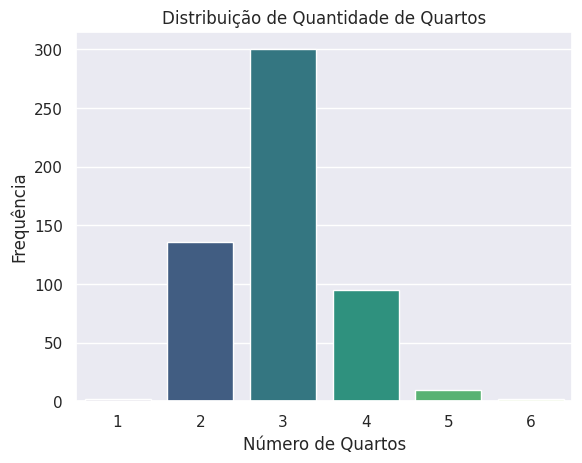

In [20]:
sns.countplot(data=df_data, x='bedrooms', palette='viridis')
plt.title('Distribuição de Quantidade de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Frequência')
plt.show()


O gráfico mostra que o número de casas com 3 quartos é predominantemente mais alto, seguido por 2 e 4 quartos. Casas com 1, 5 ou 6 quartos aparecem em menor quantidade, indicando que a maioria das casas no dataset segue um padrão de 3 quartos.

#Gráfico de Dispersão entre Área e Preço
Este gráfico de dispersão foi criado para mostrar a relação entre a área de uma casa (em metros quadrados) e o seu preço. O gráfico ajuda a visualizar como o preço das casas tende a variar com base no tamanho da propriedade.

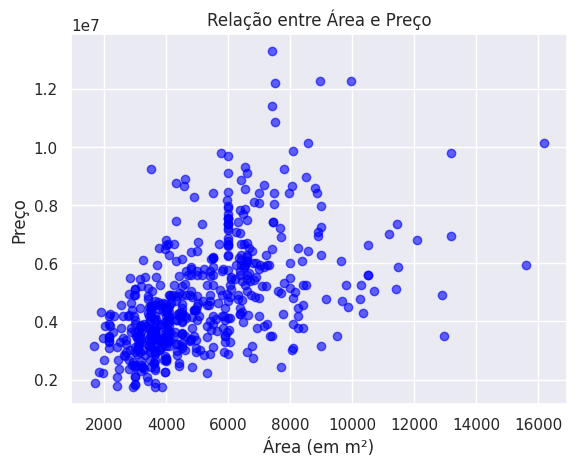

In [21]:
plt.scatter(df_data['area'], df_data['price'], alpha=0.6, color='blue')
plt.title('Relação entre Área e Preço')
plt.xlabel('Área (em m²)')
plt.ylabel('Preço')
plt.show()


Mostra a correlação entre o tamanho da casa e o preço, podendo indicar se casas maiores têm preços mais altos.

É possível observar que, de forma geral, as casas com maior área tendem a ter preços mais altos, embora haja algumas exceções. As casas menores possuem preços variados, enquanto as casas com áreas maiores frequentemente estão associadas a preços mais elevados.

#5.Apriori

#Transformar Dados em Formato Transacional:
O algoritmo Apriori trabalha com transações (listas de itens), o que significa que os dados devem ser convertidos para esse formato. Este código mostra como transformar dados categóricos em transações, facilitando o uso do Apriori.

In [45]:
from mlxtend.preprocessing import TransactionEncoder

# Transformar colunas categóricas no formato de transações
transactions = df_data[['furnishingstatus', 'guestroom', 'mainroad', 'basement']].values.tolist()
transactions = [[str(item) for item in transaction] for transaction in transactions]  # Garantir strings

te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_te = pd.DataFrame(te_array, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#O que representa cada dado:
###Furnishingstatus:

Esta coluna representa o status de mobiliário da casa, ou seja, se a casa está mobiliada, semi-mobiliada ou não mobiliada. Ela descreve a quantidade de móveis e utensílios fornecidos no imóvel.
###Guestroom:

Esta coluna indica se a casa possui um quarto de hóspedes ou não. Um valor de "yes" ou "no" indica se o imóvel tem um quarto dedicado para hóspedes.
###Mainroad:

A coluna mainroad informa se a casa está localizada perto de uma rua principal ou não. Um valor de "yes" ou "no" indica se a propriedade está próxima a uma via de grande circulação.
###Basement:

A coluna basement descreve a presença de um porão na casa. Um valor "yes" ou "no" indica se o imóvel tem ou não um porão, o que pode afetar o valor da propriedade e sua utilização.

#Por que foram escolhidos esses dados:
Esses dados foram selecionados porque são características relevantes para a análise de padrões no setor imobiliário, principalmente no que diz respeito ao preço das propriedades. Cada uma dessas características pode influenciar o valor de uma casa de diferentes maneiras.

#Aplicar o Algoritmo Apriori
Agora que os dados estão formatados corretamente, o algoritmo Apriori é utilizado para encontrar combinações de itens que aparecem frequentemente, com base no suporte mínimo. O suporte mínimo é uma métrica que define a frequência mínima com que um conjunto de itens deve aparecer no conjunto de dados para ser considerado relevante. Neste caso, o suporte mínimo foi definido como 0.1 (10%), o que significa que só serão considerados os itemsets (combinações de itens) que aparecem em pelo menos 10% das transações.

In [59]:
from mlxtend.frequent_patterns import apriori

# Encontrar conjuntos frequentes com suporte mínimo de 0.1 (ajustável)
frequent_itemsets = apriori(df_te, min_support=0.1, use_colnames=True)
print(frequent_itemsets)


     support                   itemsets
0   0.256881                (furnished)
1   0.878899                       (no)
2   0.416514           (semi-furnished)
3   0.326606              (unfurnished)
4   0.904587                      (yes)
5   0.214679            (furnished, no)
6   0.244037           (furnished, yes)
7   0.365138       (no, semi-furnished)
8   0.299083          (unfurnished, no)
9   0.783486                  (no, yes)
10  0.385321      (yes, semi-furnished)
11  0.275229         (unfurnished, yes)
12  0.201835       (furnished, no, yes)
13  0.333945  (yes, no, semi-furnished)
14  0.247706     (unfurnished, no, yes)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


O suporte e os itemsets representam as combinações de itens e a frequência com que essas combinações aparecem no conjunto de dados.

Suporte: Reflete a proporção de transações (ou registros) no dataset que contêm aquele conjunto de itens. Exemplo: Para o conjunto (semi-furnished), o suporte é 0.416514, o que significa que aproximadamente 41.65% das transações têm a característica "semi-mobilado".

Itemsets: Representa os itens que aparecem frequentemente juntos. Exemplo: (furnished, yes) indica que "mobilado" e "sim" aparecem juntos em 24.4% das transações.

#Exibindo os Primeiros Conjuntos Frequentes

In [25]:
print(frequent_itemsets.head())


    support          itemsets
0  0.256881       (furnished)
1  0.878899              (no)
2  0.416514  (semi-furnished)
3  0.326606     (unfurnished)
4  0.904587             (yes)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Gráfico para visualizar os suportes dos conjuntos frequentes

Gráfico para ilustrar os suportes dos conjuntos frequentes identificados pelo algoritmo Apriori.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


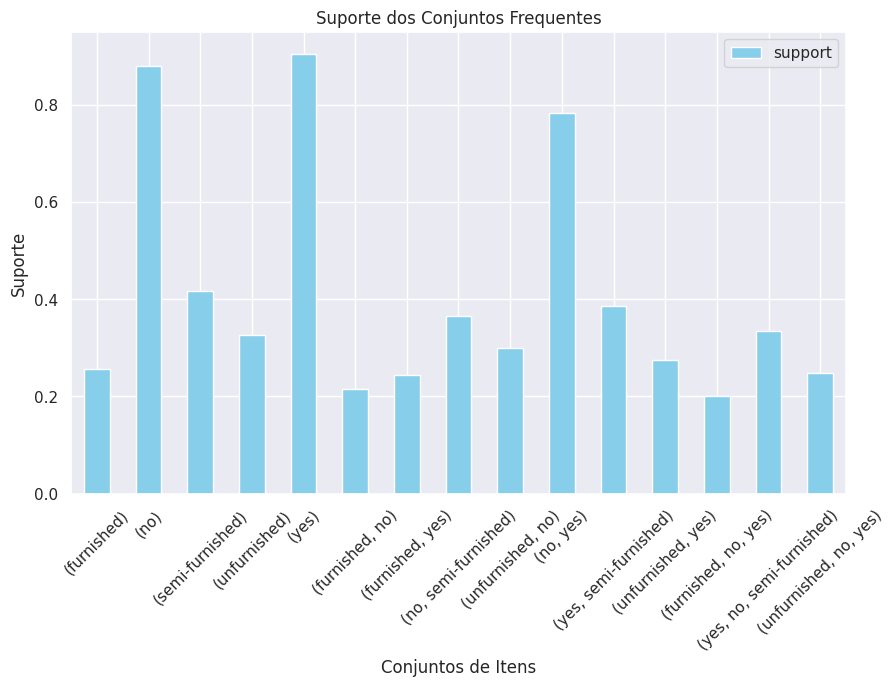

In [29]:
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', figsize=(10, 6), color='skyblue')
plt.title('Suporte dos Conjuntos Frequentes')
plt.xlabel('Conjuntos de Itens')
plt.ylabel('Suporte')
plt.xticks(rotation=45)
plt.show()



#Gerar Regras de Associação

Após aplicar o algoritmo Apriori para encontrar os conjuntos de itens mais frequentes, geramos as regras de associação para entender melhor como os itens estão relacionados entre si. Essas regras são formadas por dois componentes: os antecedentes (itens que antecedem a regra) e os consequentes (itens que são consequência da presença dos antecedentes).

No caso específico deste trabalho, utilizamos a métrica Lift para gerar as regras. O Lift ajuda a medir a força de uma regra, indicando o quanto a presença de um item aumenta a probabilidade de outro item ocorrer, comparado à sua ocorrência aleatória. Um Lift maior que 1 indica uma associação positiva, ou seja, quando um item está presente, a probabilidade do outro item também ser encontrado é maior do que se fosse aleatório.

Além disso, com o parâmetro min_threshold (limiar mínimo), podemos filtrar as regras, selecionando apenas aquelas que atendem a um critério mínimo de força (neste caso, baseado no Lift).

Após a geração das regras, é possível visualizar as regras mais fortes (com maior Lift) e analisar como os diferentes itens estão relacionados dentro do dataset.

In [51]:
from mlxtend.frequent_patterns import association_rules

# Adicionar a coluna 'length' (número de itens no conjunto)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Calcular o número total de itemsets
num_itemsets = len(frequent_itemsets)

# Gerar regras de associação com base no lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Exibir as primeiras regras geradas
print(rules.head())

# Visualizar regras mais fortes (com maior lift)
top_rules = rules.sort_values(by='lift', ascending=False)
print(top_rules.head(10))


     antecedents       consequents  antecedent support  consequent support  \
0    (furnished)             (yes)            0.256881            0.904587   
1          (yes)       (furnished)            0.904587            0.256881   
2  (unfurnished)              (no)            0.326606            0.878899   
3           (no)     (unfurnished)            0.878899            0.326606   
4          (yes)  (semi-furnished)            0.904587            0.416514   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.244037    0.950000  1.050203               1.0  0.011666    1.908257   
1  0.244037    0.269777  1.050203               1.0  0.011666    1.017661   
2  0.299083    0.915730  1.041906               1.0  0.012029    1.437064   
3  0.299083    0.340292  1.041906               1.0  0.012029    1.020747   
4  0.385321    0.425963  1.022688               1.0  0.008548    1.016462   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.064327

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Dados Formatados

In [54]:
import pandas as pd

# Exemplo de DataFrame com os dados fornecidos (só para exemplificação)
data = {
    'antecedents': ['(furnished)', '(yes)', '(unfurnished)', '(no)', '(yes)', '(furnished, no)', '(unfurnished, yes)', '(no, yes)', '(semi-furnished)', '(semi-furnished)'],
    'consequents': ['(yes)', '(furnished)', '(no)', '(unfurnished)', '(semi-furnished)', '(yes)', '(no)', '(semi-furnished)', '(no, yes)', '(no, yes)'],
    'antecedent support': [0.256881, 0.904587, 0.326606, 0.878899, 0.904587, 0.214679, 0.275229, 0.783486, 0.416514, 0.416514],
    'consequent support': [0.904587, 0.256881, 0.878899, 0.326606, 0.416514, 0.904587, 0.878899, 0.416514, 0.783486, 0.783486],
    'support': [0.244037, 0.244037, 0.299083, 0.299083, 0.385321, 0.201835, 0.247706, 0.201835, 0.333945, 0.333945],
    'confidence': [0.950000, 0.269777, 0.915730, 0.340292, 0.425963, 0.940171, 0.900000, 0.940171, 0.426230, 0.801762],
    'lift': [1.050203, 1.050203, 1.041906, 1.041906, 1.022688, 1.039337, 1.024008, 1.039337, 1.023326, 1.023326],
    'leverage': [0.011666, 0.011666, 0.012029, 0.012029, 0.008548, 0.007639, 0.005808, 0.007639, 0.016651, 0.016651],
    'conviction': [1.908257, 1.017661, 1.437064, 1.020747, 1.016462, 1.594758, 1.211009, 1.010870, 1.016933, 1.092192]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Aplicar formatação numérica sem cores
df_styled = df.style.format({
    'support': '{:.2f}',
    'confidence': '{:.2f}',
    'lift': '{:.2f}',
    'leverage': '{:.4f}',
    'conviction': '{:.4f}'
}).set_caption("Regras de Associação (sem cores)")

# Exibir a tabela estilizada
df_styled



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(furnished),(yes),0.256881,0.904587,0.24,0.95,1.05,0.0117,1.9083
1,(yes),(furnished),0.904587,0.256881,0.24,0.27,1.05,0.0117,1.0177
2,(unfurnished),(no),0.326606,0.878899,0.30,0.92,1.04,0.0120,1.4371
3,(no),(unfurnished),0.878899,0.326606,0.30,0.34,1.04,0.0120,1.0207
4,(yes),(semi-furnished),0.904587,0.416514,0.39,0.43,1.02,0.0085,1.0165
5,"(furnished, no)",(yes),0.214679,0.904587,0.20,0.94,1.04,0.0076,1.5948
6,"(unfurnished, yes)",(no),0.275229,0.878899,0.25,0.90,1.02,0.0058,1.2110
7,"(no, yes)",(semi-furnished),0.783486,0.416514,0.20,0.94,1.04,0.0076,1.0109
8,(semi-furnished),"(no, yes)",0.416514,0.783486,0.33,0.43,1.02,0.0167,1.0169
9,(semi-furnished),"(no, yes)",0.416514,0.783486,0.33,0.80,1.02,0.0167,1.0922


Esta primeira linha representa uma relação interessante entre casas mobiladas e o atributo "yes". O Lift de 1.05 indica uma associação moderada entre essas características, e o confidence de 0.24 mostra que, em 24% dos casos de casas mobiladas, existe a presença do atributo "yes".

#Gráfico de Dispersão: Suporte vs Confiança
Neste gráfico, a relação entre o suporte e a confiança das regras de associação é mostrada. O eixo X representa o suporte, que indica a frequência com que um conjunto de itens aparece no conjunto de dados, enquanto o eixo Y representa a confiança, que é a probabilidade de que os consequentes de uma regra se manifestem quando os antecedentes estão presentes.

A cor dos pontos no gráfico é determinada pelo lift, o qual é mostrado ao lado do gráfico, com o uso da paleta de cores viridis. O lift mede o quão forte é a associação entre os itens, e é indicado pela intensidade da cor no gráfico.

Esse gráfico ajuda a visualizar a distribuição das regras com base no seu suporte, confiança e força da associação, com os valores de lift sendo representados pela variação de cor.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


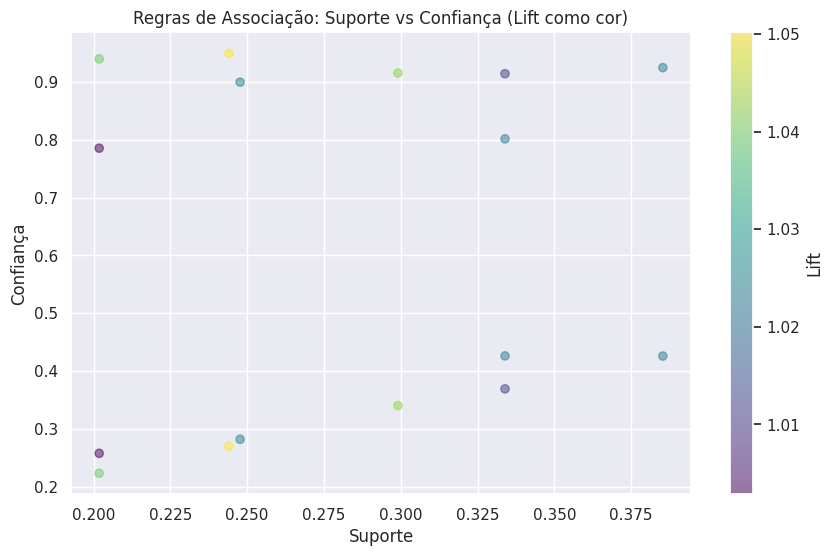

In [55]:
import matplotlib.pyplot as plt

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Lift')

plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.title('Regras de Associação: Suporte vs Confiança (Lift como cor)')
plt.show()


#Resumo das Melhores Regras com Maior Lift e Confiança
Este resumo mostra as regras de associação com os maiores valores de lift e confiança.
Com base nesses critérios, optou-se por selecionar as 10 melhores regras, considerando as associações mais significativas dentro do conjunto de dados.

In [56]:
# Resumo das melhores regras com maior lift e confiança
summary = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']] \
    .sort_values(by='lift', ascending=False).head(10)

# Exibir o resumo
summary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(furnished),(yes),0.244037,0.950000,1.050203
1,(yes),(furnished),0.244037,0.269777,1.050203
2,(unfurnished),(no),0.299083,0.915730,1.041906
3,(no),(unfurnished),0.299083,0.340292,1.041906
6,"(furnished, no)",(yes),0.201835,0.940171,1.039337
9,(yes),"(furnished, no)",0.201835,0.223124,1.039337
14,"(unfurnished, yes)",(no),0.247706,0.900000,1.024008
15,(no),"(unfurnished, yes)",0.247706,0.281837,1.024008
10,"(no, yes)",(semi-furnished),0.333945,0.426230,1.023326
13,(semi-furnished),"(no, yes)",0.333945,0.801762,1.023326


#6.Conclusão
Neste trabalho, aplicamos o algoritmo Apriori para encontrar padrões de associação no dataset de preços de casas. Usando o suporte e a confiança, geramos regras que mostram como certas características, como o status de mobiliário e o tipo de quarto, estão frequentemente relacionadas entre si.

